In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# reflect the tables

Base = automap_base()
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found

Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table

measurement = Base.classes.measurement
station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)


# Exploratory Precipitation Analysis

In [27]:
session.query(measurement).first().__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb4f8e2f610>,
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397'}

In [86]:
# Find the most recent date in the data set.

print("Most recent date: " + session.query(measurement.date).order_by(measurement.date.desc()).first()[0])


Most recent date: 2017-08-23


<AxesSubplot:xlabel='Date', ylabel='Precipitation(in)'>

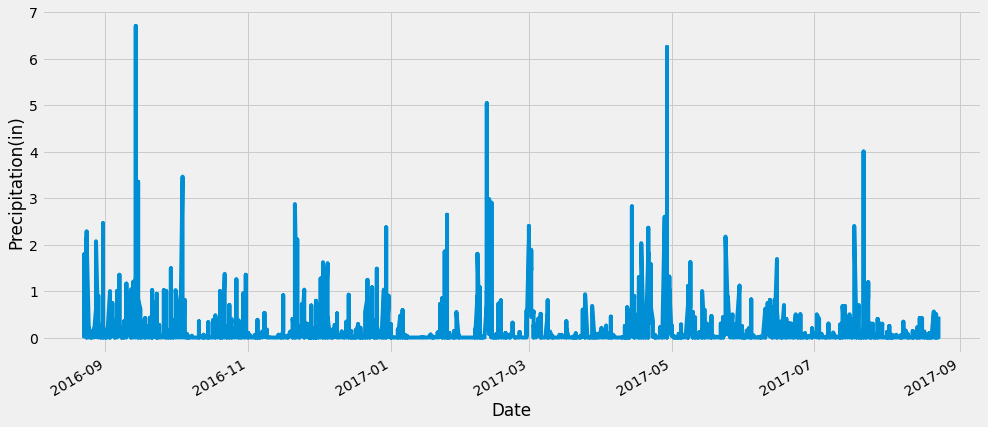

In [88]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

year_before = dt.date(2017, 8, 23) - dt.timedelta(days=365)


# Perform a query to retrieve the date and precipitation scores

results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_before).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
dates = []
precip = []

for row in results:
    dates.append(row[0])
    if str(row[1]) == "None":
        precip.append(0.0)
    else:
        precip.append(row[1])

date_precip = pd.DataFrame({"Date": dates, "Precipitation": precip})
date_precip["Date"] = pd.to_datetime(date_precip["Date"])


# Sort the dataframe by date

date_precip.sort_values(["Date"], ascending=True)


# Use Pandas Plotting with Matplotlib to plot the data

x = date_precip["Date"]
y = date_precip["Precipitation"]

# plt.plot(x,y)

date_precip.plot("Date", "Precipitation", legend=False, ylabel="Precipitation(in)", figsize=(15,7))


In [89]:
# Use Pandas to calcualte the summary statistics for the precipitation data

date_precip.describe()


,Precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [76]:
# Design a query to calculate the total number stations in the dataset

print("Total Number of Stations: " + str(session.query(station.station).count()))


Total Number of Stations: 9


In [90]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

count = []

for row in session.query(station.station).all():
    count.append((row[0], session.query(measurement.station).filter(measurement.station == row[0]).count()))

def sortSecond(val): 
    return val[1] 

count.sort(reverse=True, key=sortSecond)

print("Observations per Station \n")

for val in count:
    print(val[0] + ": " + str(val[1]) + " observations")


Observations per Station 

USC00519281: 2772 observations
USC00519397: 2724 observations
USC00513117: 2709 observations
USC00519523: 2669 observations
USC00516128: 2612 observations
USC00514830: 2202 observations
USC00511918: 1979 observations
USC00517948: 1372 observations
USC00518838: 511 observations


In [91]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

tempobs = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').all()
temps = []

for row in tempobs:
    temps.append(row[0])

print("Temperature(F) Observations from Station USC00519281\n")
print("Max: " + str(max(temps)))
print("Min: " + str(min(temps)))
print("Avg: " + str(round(sum(temps)/len(temps),2)))


Temperature(F) Observations from Station USC00519281

Max: 85.0
Min: 54.0
Avg: 71.66


Text(0.5, 0, 'Times Observed')

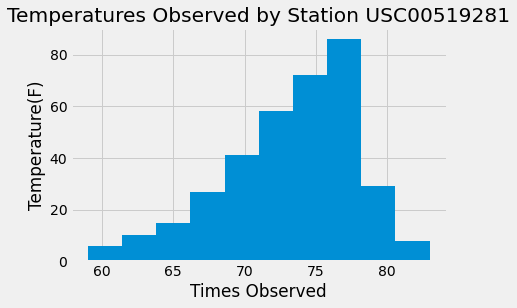

In [92]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tempobs = session.query(measurement.tobs).filter(measurement.date >= year_before).filter(measurement.station == 'USC00519281').all()
temps = []

for row in tempobs:
    temps.append(row[0])
    
plt.hist(temps)
plt.title("Temperatures Observed by Station USC00519281")
plt.ylabel("Temperature(F)")
plt.xlabel("Times Observed")


# Close session

In [93]:
# Close Session
session.close()